# Utilizando SVM (Support Vector Machine)

Conheça mais em http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [1]:
# Importando as dependências
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Vamos carregar novamente o dataset de IRIS
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,  3.5,  1.5,  0.2],
        [ 5.2,  3.4,  1.4,  0.2],
      

In [4]:
# Vendo a descrição do dataset
print ("Iris data set Description  ", iris['DESCR'])

Iris data set Description   Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missi

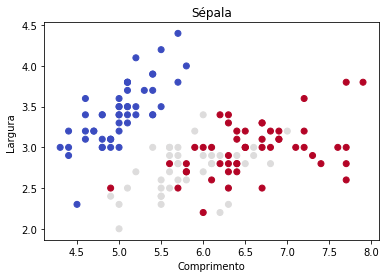

In [5]:
# Visualizando a relação sépala
def visualize_sepal_data():
    X = iris.data[:, :2]  
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Comprimento')
    plt.ylabel('Largura ')
    plt.title('Sépala')
    plt.show()
 
visualize_sepal_data()

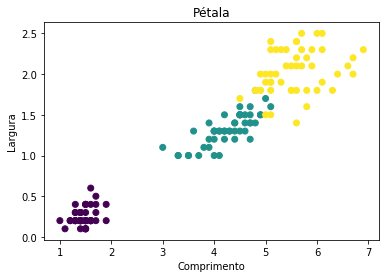

In [6]:
# Visualizando a relação de pétalas
def visuvalize_petal_data():
    X = iris.data[:, 2:]  # we only take the last two features.
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Comprimento')
    plt.ylabel('Largura')
    plt.title('Pétala')
    plt.show()
 
visuvalize_petal_data()

In [7]:
# Separando X e y, sendo X apenas as informaçoes de sépala
X = iris.data[:, :2] 
y = iris.target

In [8]:
# Vendo os dados de X
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

In [9]:
# Vendo os dados de y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
def plot_4_models(svm_1, svm_2, svm_3, svm_4):
    # Plotando os resultados de processamento dos 4 modelos SVM
    h = .02 
    # criando uma malha para plotar
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Plotando os 4 gráficos
    plt.figure(figsize=(8,8))
    for i, modelo in enumerate((svm_1, svm_2, svm_3, svm_4)):
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        pred = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        pred = pred.reshape(xx.shape)
        plt.contourf(xx, yy, pred, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])
 
    plt.show()

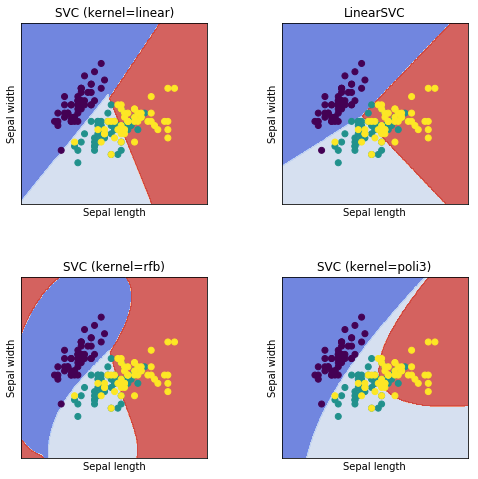

In [11]:
# Criando 4 modelos diferentes de SVM (Suport Vector Machine)
svm_1 = svm.SVC(kernel='linear').fit(X, y)
svm_2 = svm.LinearSVC().fit(X, y)
svm_3 = svm.SVC(kernel='rbf', gamma=0.7).fit(X, y)
svm_4 = svm.SVC(kernel='poly', degree=3).fit(X, y)
titles = ['SVC (kernel=linear)', 'LinearSVC', 'SVC (kernel=rfb)', 'SVC (kernel=poli3)']
plot_4_models(svm_1, svm_2, svm_3, svm_4)

Veja que ainda não ficou boa a separação dos clusters

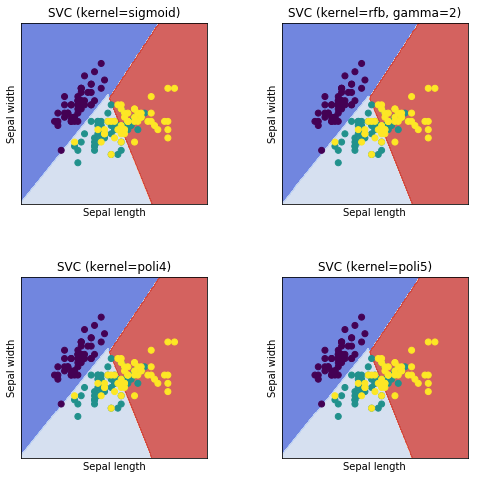

In [12]:
# Vamos alterar um pouco os modelos para ver se melhoram
svm_1 = svm.SVC(kernel='linear', C=2.0).fit(X, y)
svm_2 = svm.SVC(kernel='linear', C=3).fit(X, y)
svm_3 = svm.SVC(kernel='linear', coef0=0.1).fit(X, y)
svm_4 = svm.SVC(kernel='linear', coef0=1.0).fit(X, y)
titles = ['SVC (kernel=sigmoid)', 'SVC (kernel=rfb, gamma=2)', 'SVC (kernel=poli4)', 'SVC (kernel=poli5)']
plot_4_models(svm_1, svm_2, svm_3, svm_4)

In [13]:
# Vamos agora mudar para a análise de Pétalas
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target

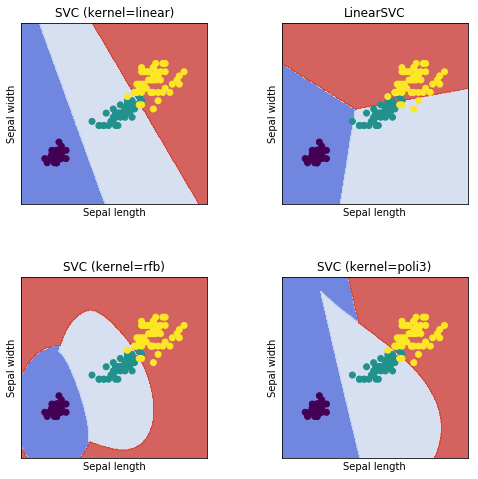

In [14]:
# Vamos ver o primeiro processamento de 4 modelos como ficou:
svm_1 = svm.SVC(kernel='linear').fit(X, y)
svm_2 = svm.LinearSVC().fit(X, y)
svm_3 = svm.SVC(kernel='rbf', gamma=0.7).fit(X, y)
svm_4 = svm.SVC(kernel='poly', degree=3).fit(X, y)
titles = ['SVC (kernel=linear)', 'LinearSVC', 'SVC (kernel=rfb)', 'SVC (kernel=poli3)']
plot_4_models(svm_1, svm_2, svm_3, svm_4)

## Exercício 9

Implemente outras variações de tipos de kernel (linear, rbf, sigmoid e poly) além dos parâmetros C, coef0, degree,
lembrando que degree só é aplicável quando utilizamos SVMs polinomiais (kernel=poly)

Avalie qual modelo conseguiu dividir melhor os dados de Sépala

Repita os testes para avaliar qual o modelo divide melhor os dados de Pétalas

Salve o Jupyter com o nome 07_SVM_Fulano